In [64]:
import pandas as pd
import warnings
from math import nan
warnings.filterwarnings('ignore')

save_path = 'C:/GitHub/SUEWS_DB_Typology_test/met/'

year = 2018
df_met_gvc = pd.DataFrame()

for month in range(1,13):

    try:
        url = f'http://biggeo.gvc.gu.se/ClimateStations/GVCdata/gvc_roof_10mindata_{year}_{month}.txt'
        df = pd.read_csv(url, delim_whitespace=True,  index_col=False)
        df_met_gvc = pd.concat([df_met_gvc, df])
    except:
        print(f'GVC ROOF - Month: {month} not availible.')

df_met_gvc.to_csv( save_path + f'gvc_roof_10mindata_{year}.csv', sep = ',')

df_met_bro = pd.DataFrame()

for month in range(1,13):
    try:    
        url = f'http://biggeo.gvc.gu.se/ClimateStations/Bridgedata/bro_10mindata_{year}_{month}.txt'
        df = pd.read_csv(url, delim_whitespace=True,  index_col=False)
        df_met_bro = pd.concat([df_met_bro, df])
    except:
        print(f'ÄLVSBORGSBRON - Month: {month} not availible.')


# df_met_bro.to_csv( save_path + f'bro_10mindata_{year}.csv', sep = ',')

# create df with list of all DOY in a year
all_days = pd.DataFrame({'DOY': range(1, 366)})

# merge all days with metdatadays
merged_df_gvc = all_days.merge(df_met_gvc, on='DOY', how='left', indicator=True)
merged_df_bro = all_days.merge(df_met_bro, on='DOY', how='left', indicator=True)


# Filter out missing days
missing_days_gvc = merged_df_gvc[merged_df_gvc['_merge'] == 'left_only']['DOY']
missing_days_bro = merged_df_bro[merged_df_bro['_merge'] == 'left_only']['DOY']

print("Missing days from gvc_roof:", missing_days_gvc.tolist())
print('\t****************************************************')
print("Missing days from Älvsborgsbron:", missing_days_bro.tolist())
print('\t****************************************************')


# Hitta gemensamma dagar
common_days = list(set(missing_days_gvc) & set(missing_days_bro))

print("Missing days  common days:", common_days)



GVC ROOF - Month: 7 not availible.
ÄLVSBORGSBRON - Month: 7 not availible.
Missing days from gvc_roof: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 303, 304, 305, 306, 307, 308, 327, 328, 329, 330, 331, 332, 333, 360, 361, 362, 363, 364, 365]
	****************************************************
Missing days from Älvsborgsbron: [182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212]
	****************************************************
Missing days  common days: [182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212]


In [5]:
df_back2017 = pd.read_csv(save_path + 'taket_back2017typ.csv', sep = ';', index_col= 'TIMESTAMP')
df_back2017.index = pd.DatetimeIndex(df_back2017.index)
df_back2017['DOY'] = df_back2017.index.dayofyear
df_back2017['HHMM'] = df_back2017.index.strftime('%H%M').astype('str')
# df_back2017.to_csv(save_path + 'taket_back2017typdoyhmm.csv')



In [69]:
df_back2018 = pd.read_csv(save_path + 'gvc_roof_backup.csv', sep = ';', index_col= 'TIMESTAMP')
df_back2018.index = pd.DatetimeIndex(df_back2018.index)
df_back2018['DOY'] = df_back2018.index.dayofyear
df_back2018['HHMM'] = df_back2018.index.strftime('%H%M').astype('str')
df_back2018.to_csv(save_path + 'gvc_roof_backup_doyhhmm.csv')



<Axes: xlabel='datetime'>

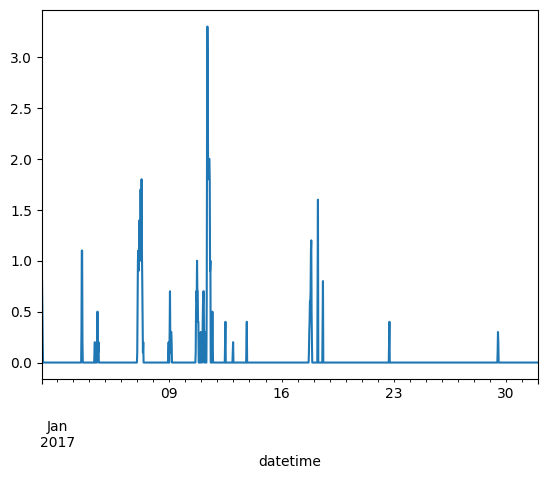

In [ ]:
# df15 = pd.read_csv(save_path + 'rain_SMHI_2017.csv',sep= ';')
# df15['datetime'] = df15['Date'] + ' ' + df15['Time']

# df15['datetime'] = pd.to_datetime(df15['datetime'])
# df15 = df15.set_index('datetime')

# # Säkerställ att df15.index är tidszonsmedveten
# df15.index = df15.index.tz_localize('UTC')

# # Konvertera df15 till UTC+1
# df15.index = df15.index.tz_convert('UTC').tz_localize(None) + pd.Timedelta(hours=1)

# # Resampla df15 till 10-minuters upplösning
# df15_resampled = df15.resample('10T').interpolate(method='time')

# df15_resampled.loc['2017-01','Rain'].resample('30min').sum().plot()


In [29]:

# s = '2078-07'
# ivar = 'Ta'
# uvar = 'LUFTTEMP_Avg'


df = df_met_gvc.copy()

# # Skapa en tid-kolumn från HHMM
df['time'] = pd.to_timedelta(df['HHMM'].astype(str).str.zfill(4).str[:2] + ':' + df['HHMM'].astype(str).str.zfill(4).str[2:] + ':00')

df['date'] = pd.to_datetime(df['Year'].astype(str) + df['DOY'].astype(str), format='%Y%j')

df['HHMM'].astype(str).str.zfill(4).str[:2] + ':' + df['HHMM'].astype(str).str.zfill(4).str[2:] + ':00'

df['datetime'] = df['date'] + df['time']


df = df.set_index('datetime')



# # Skapa en tid-kolumn från HHMM
df_met_bro['time'] = pd.to_timedelta(df_met_bro['HHMM'].astype(str).str.zfill(4).str[:2] + ':' + df_met_bro['HHMM'].astype(str).str.zfill(4).str[2:] + ':00')

df_met_bro['date'] = pd.to_datetime(df_met_bro['YYYY'].astype(str) + df_met_bro['DOY'].astype(str), format='%Y%j')

df_met_bro['HHMM'].astype(str).str.zfill(4).str[:2] + ':' + df_met_bro['HHMM'].astype(str).str.zfill(4).str[2:] + ':00'

df_met_bro['datetime'] = df_met_bro['date'] + df_met_bro['time']


df_met_bro = df_met_bro.set_index('datetime')
# df.loc[s,ivar] = df_back2018.loc[s, uvar]



In [ ]:
## 2017

df_back2017['Tabb'] = df_back2017['Ta_K_Avg'].astype(float) -273.15

# Create a dictionary for column name correspondence
column_mapping_b = {
    'Ta.1': 'Tabb',
    'GlobalRadiaion_SPN1': 'SW_in_Avg',
    'DiffuseRadiation_SPN1' : 'SPN1_diff_Avg',
    'Ldown' : 'LW_in_Avg'
    # Add more mappings as needed
}

# Function to find missing timesteps and fill missing data
def fill_missing_data(df, df_back2017, column_mapping):
    # Generate the complete datetime index for 2017 with 10-minute intervals
    full_index = pd.date_range(start='20178-01-01', end='2017-12-31 23:59:59', freq='10T')

    # Remove duplicate labels from the index
    df = df[~df.index.duplicated(keep='first')]

    # Reindex df to include all timesteps in full_index
    df = df.reindex(full_index)

    # Loop through all rows to find missing data
    for index, row in df.iterrows():
        for col in column_mapping.keys():
            if pd.isna(row[col]):
                # Get the corresponding column name in df_back2017
                back_col = column_mapping[col]
                # Check if the data is available in df_back2017
                if index in df_back2017.index and not pd.isna(df_back2017.loc[index, back_col]):
                    # Fill the missing data in df with the value from df_back2017
                    # print(index)
                    df.at[index, col] = df_back2017.loc[index, back_col]

    return df

# Example usage:
filled_df = fill_missing_data(df, df_back2017, column_mapping_b)

column_mapping_bro = {
    'Ta.1': 'Ta',
    'Ws_avg':'Ws_avg',
    'RH.1' :'RH',
    'P' : 'P',
    'CumulativeRain':'R_intens',
    'DOY':'DOY',
    'HHMM': 'HHMM'

    # Add more mappings as needed
}

filled_df = fill_missing_data(filled_df,df_met_bro,column_mapping_bro)

for col in filled_df.columns:
    filled_df[col] = filled_df[col].interpolate(limit=4)


In [26]:
filled_df.to_csv(save_path +'filled_gap2017.csv')

# 2018


In [70]:
year = 2018
df_met_gvc = pd.DataFrame()

for month in range(1,13):

    try:
        url = f'http://biggeo.gvc.gu.se/ClimateStations/GVCdata/gvc_roof_10mindata_{year}_{month}.txt'
        df = pd.read_csv(url, delim_whitespace=True,  index_col=False)
        df_met_gvc = pd.concat([df_met_gvc, df])
    except:
        print(f'GVC ROOF - Month: {month} not availible.')

# df_met_gvc.to_csv( save_path + f'gvc_roof_10mindata_{year}.csv', sep = ',')

df_met_bro = pd.DataFrame()

for month in range(1,13):
    try:    
        url = f'http://biggeo.gvc.gu.se/ClimateStations/Bridgedata/bro_10mindata_{year}_{month}.txt'
        df = pd.read_csv(url, delim_whitespace=True,  index_col=False)
        df_met_bro = pd.concat([df_met_bro, df])
    except:
        print(f'ÄLVSBORGSBRON - Month: {month} not availible.')


# df_met_bro.to_csv( save_path + f'bro_10mindata_{year}.csv', sep = ',')

# create df with list of all DOY in a year
all_days = pd.DataFrame({'DOY': range(1, 366)})

# merge all days with metdatadays
merged_df_gvc = all_days.merge(df_met_gvc, on='DOY', how='left', indicator=True)
merged_df_bro = all_days.merge(df_met_bro, on='DOY', how='left', indicator=True)


# Filter out missing days
missing_days_gvc = merged_df_gvc[merged_df_gvc['_merge'] == 'left_only']['DOY']
missing_days_bro = merged_df_bro[merged_df_bro['_merge'] == 'left_only']['DOY']

print("Missing days from gvc_roof:", missing_days_gvc.tolist())
print('\t****************************************************')
print("Missing days from Älvsborgsbron:", missing_days_bro.tolist())
print('\t****************************************************')


# Hitta gemensamma dagar
common_days = list(set(missing_days_gvc) & set(missing_days_bro))

print("Missing days  common days:", common_days)



GVC ROOF - Month: 7 not availible.
ÄLVSBORGSBRON - Month: 7 not availible.
Missing days from gvc_roof: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 303, 304, 305, 306, 307, 308, 327, 328, 329, 330, 331, 332, 333, 360, 361, 362, 363, 364, 365]
	****************************************************
Missing days from Älvsborgsbron: [182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212]
	****************************************************
Missing days  common days: [182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212]


In [89]:

# s = '2078-07'
# ivar = 'Ta'
# uvar = 'LUFTTEMP_Avg'


df = df_met_gvc.copy()

# # Skapa en tid-kolumn från HHMM
df['time'] = pd.to_timedelta(df['HHMM'].astype(str).str.zfill(4).str[:2] + ':' + df['HHMM'].astype(str).str.zfill(4).str[2:] + ':00')

df['date'] = pd.to_datetime(df['Year'].astype(str) + df['DOY'].astype(str), format='%Y%j')

df['HHMM'].astype(str).str.zfill(4).str[:2] + ':' + df['HHMM'].astype(str).str.zfill(4).str[2:] + ':00'

df['datetime'] = df['date'] + df['time']


df = df.set_index('datetime')



# # Skapa en tid-kolumn från HHMM
df_met_bro['time'] = pd.to_timedelta(df_met_bro['HHMM'].astype(str).str.zfill(4).str[:2] + ':' + df_met_bro['HHMM'].astype(str).str.zfill(4).str[2:] + ':00')

df_met_bro['date'] = pd.to_datetime(df_met_bro['YYYY'].astype(str) + df_met_bro['DOY'].astype(str), format='%Y%j')

df_met_bro['HHMM'].astype(str).str.zfill(4).str[:2] + ':' + df_met_bro['HHMM'].astype(str).str.zfill(4).str[2:] + ':00'

df_met_bro['datetime'] = df_met_bro['date'] + df_met_bro['time']


df_met_bro = df_met_bro.set_index('datetime')
# df.loc[s,ivar] = df_back2018.loc[s, uvar]
df['Ta.1'] = nan


<Axes: xlabel='TIMESTAMP'>

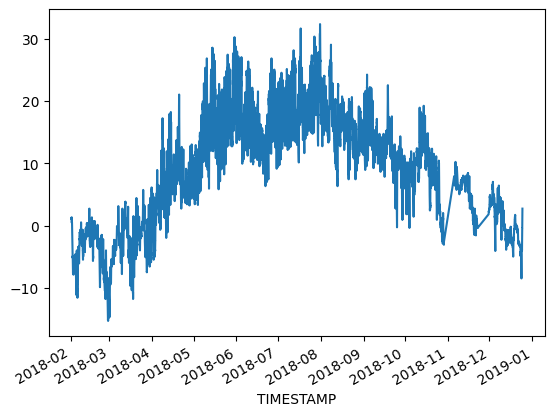

In [87]:
df_back2018.loc['2018','Tabb'].plot()

In [93]:
df_back2018['Tabb'] = df_back2018['temp_L_K_Avg'].astype(float) -273.15

df['Ws_avg'] = df['Ws_avg'].replace(0,nan)

# Create a dictionary for column name correspondence
column_mapping_b = {
    'Ta.1': 'Tabb',
    'GlobalRadiaion_SPN1': 'SPN1_Tota_Avg',
    'DiffuseRadiation_SPN1' : 'SPN1_diff_Avg',
    'Ws_avg' : 'Ws_avg_Avg'
    # Add more mappings as needed
}

# Function to find missing timesteps and fill missing data
def fill_missing_data(df, df_back2018, column_mapping):
    # Generate the complete datetime index for 2017 with 10-minute intervals
    full_index = pd.date_range(start='2018-01-01', end='2018-12-31 23:59:59', freq='10T')

    # Remove duplicate labels from the index
    df = df[~df.index.duplicated(keep='first')]

    # Reindex df to include all timesteps in full_index
    df = df.reindex(full_index)

    # Loop through all rows to find missing data
    for index, row in df.iterrows():
        for col in column_mapping.keys():
            if pd.isna(row[col]):
                # Get the corresponding column name in df_back2017
                back_col = column_mapping[col]
                # Check if the data is available in df_back2018
                if index in df_back2018.index and not pd.isna(df_back2018.loc[index, back_col]):
                    # Fill the missing data in df with the value from df_back2017
                    # print(index)
                    df.at[index, col] = df_back2018.loc[index, back_col]

    return df

# # Example usage:
filled_df = fill_missing_data(df, df_back2018, column_mapping_b)

column_mapping_bro = {
    # 'Ta.1': 'Ta',
    # 'Ws_avg':'Ws_avg',
    # 'RH.1' :'RH',
    # 'P' : 'P',
    'R_intens':'R_intens',
    'DOY':'DOY',
    'HHMM': 'HHMM'

    # Add more mappings as needed
}

filled_df = fill_missing_data(filled_df,df_met_bro,column_mapping_bro)

for col in filled_df.columns:
    filled_df[col] = filled_df[col].interpolate(limit=4)


filled_df.to_csv(save_path + 'filled_gap2018.csv')


<Axes: >

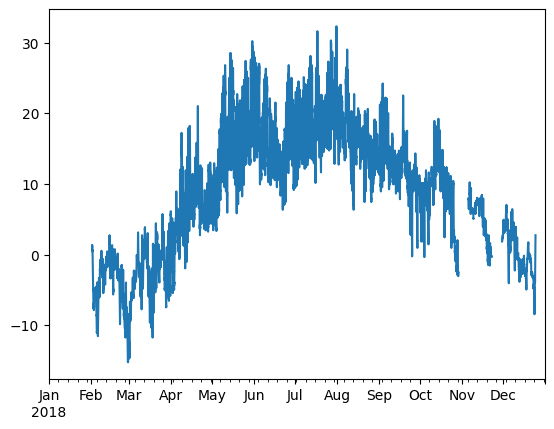

In [92]:
filled_df.loc['2018','Ta.1'].plot()

In [ ]:
# Konvertera df15 till UTC+1
df15.index = df15.index.tz_convert('UTC').tz_localize(None) + pd.Timedelta(hours=1)

# Resampla df15 till 10-minuters upplösning
df15_resampled = df15.resample('10T').interpolate()

# Sammanfoga de två tidsserierna
df_combined = df.combine_first(df15_resampled)


In [ ]:
# sp.util.fill_gap_all(filled_df['Ta.1'])

filled_df['Ta.1'] = filled_df['Ta.1'].interpolate(limit=3)


count    41357.000000
mean        10.305641
std          5.373913
min         -7.680000
25%          5.800000
50%         11.030000
75%         14.700000
max         24.590000
Name: Ta.1, dtype: float64

In [ ]:
from math import nan
df['Ws_avg.1'].replace(0,nan)



datetime
2017-01-18 13:40:00    5.23
2017-01-18 13:50:00    5.33
2017-01-18 14:00:00    5.10
2017-01-18 14:10:00    4.56
2017-01-18 14:20:00    4.02
                       ... 
2017-12-31 23:10:00    5.75
2017-12-31 23:20:00    5.98
2017-12-31 23:30:00    5.16
2017-12-31 23:40:00    5.84
2017-12-31 23:50:00    5.25
Name: Ws_avg.1, Length: 49603, dtype: float64

In [91]:
df_met_gvc.columns

Index(['Code', 'Year', 'DOY', 'HHMM', 'Ta', 'RH', 'Ws', 'Wd', 'Wd_sd',
       'RainPerPeriod', 'CumulativeRain', 'AirPressure', 'Integer', 'Decimal',
       'GlobalRadiaion_SPN1', 'DiffuseRadiation_SPN1', 'L_tempK', 'L_sig',
       'Ldown', 'Wd_min', 'Wd_avg', 'Wd_max', 'Ws_min', 'Ws_avg', 'Ws_max',
       'Ta.1', 'RH.1', 'P', 'R_amount', 'R_time', 'R_intens', 'H_amount',
       'H_time', 'H_intens', 'Ws_avg.1', 'Wd_avg.1', 'Wd_std'],
      dtype='object')